In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
airlines=pd.read_excel('Airlines+Data.xlsx')

In [4]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [6]:
month=pd.DataFrame(month)

In [7]:
month

,0
0,Jan
1,Feb
2,Mar
3,Apr
4,May
5,Jun
6,Jul
7,Aug
8,Sep
9,Oct


In [8]:
months=pd.DataFrame(np.tile(month,(8,1)))

In [9]:
Airlines=pd.concat([airlines,months],axis=1)
Airlines.columns=['Month','Passengers','months']

In [10]:
month_dummies=pd.get_dummies(Airlines['months'])

In [11]:
Airlines=pd.concat([Airlines,month_dummies],axis=1)


In [12]:

Airlines['t']=np.arange(1,97)
Airlines['t_sq']=Airlines['t']*Airlines['t']
Airlines['log_passengers']=np.log(Airlines['Passengers'])

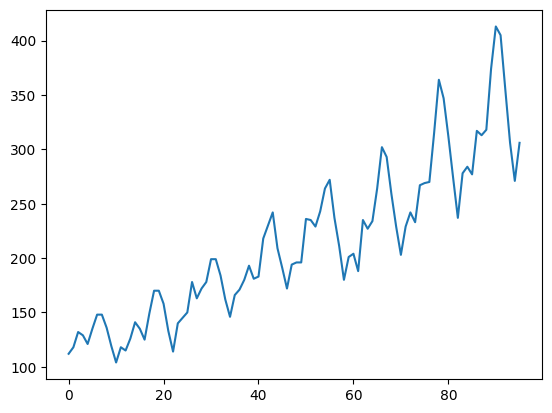

In [13]:
Train=Airlines[0:85]
Test=Airlines[85:]
plt.plot(Airlines.iloc[:,1])
Test.set_index(np.arange(1,12),inplace=True)

In [14]:

#Linear
import statsmodels.formula.api as smf
lin_model=smf.ols('Passengers~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Passengers']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

55.674170015416244

In [15]:
#Exponential
exp_model=smf.ols('log_passengers~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Passengers']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

329.69175113922927

In [16]:
#Quadratic
import statsmodels.formula.api as smf
quad_model=smf.ols('Passengers~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Passengers']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad


50.65954577650133

In [17]:
#Additive Seasonality
import statsmodels.formula.api as smf
add_sea_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_add_sea=Test['Passengers']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

134.3447991043276

In [18]:
#Additive Seasonality Quadratic
add_sea_quad_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']])
error_add_sea_quad=Test['Passengers']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

27.412714961200113

In [19]:
#Multiplicative Seasonality
import statsmodels.formula.api as smf
mul_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_sea=Test['Passengers']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

330.1926780196679

In [20]:
#Multiplicative Seasonlity
import statsmodels.formula.api as smf
mul_add_sea_model=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_add_sea=Test['Passengers']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))


In [21]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table

,model,rmse_val
0,lin_model,55.674170
1,exp_model,329.691751
2,quad_model,50.659546
3,add_sea,134.344799
4,add_sea_quad,27.412715
5,mul_sea,330.192678
6,mul_add_sea,329.660326


In [22]:
#Additive Seasonality Quadratic is having least rmse hence it is the best model


# QUESTION NO 2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [25]:
coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [26]:
quarters=['Q1','Q2','Q3','Q4']
quarters=pd.DataFrame(quarters)

In [27]:
Quarters=pd.DataFrame(np.tile(quarters,(11,1)))
coca=pd.concat([coca,Quarters],axis=1)

In [28]:
coca=coca.dropna()

In [29]:
coca.columns=['Quarter','Sales','quarters']

In [30]:
Quarters_dummies=pd.get_dummies(coca['quarters'])

In [31]:
coca=pd.concat([coca,Quarters_dummies],axis=1)

In [32]:
coca['t']=np.arange(1,43)
coca['t_sq']=coca['t']*coca['t']
coca['log_sales']=np.log(coca['Sales'])

In [33]:
Train=coca[0:30]
Test=coca[30:]

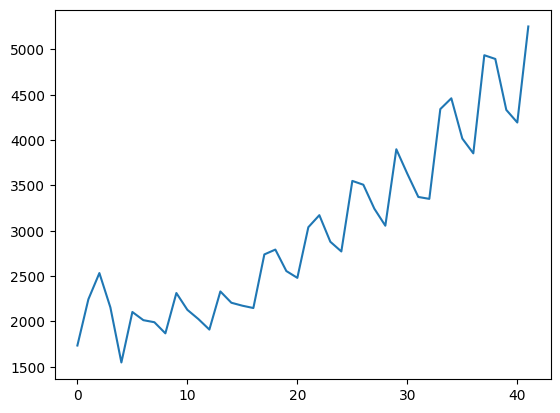

In [34]:
plt.plot(coca.iloc[:,1])
Test.set_index(np.arange(1,13),inplace=True)

In [35]:
#linear
import statsmodels.formula.api as smf
lin_model=smf.ols('Sales~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Sales']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

714.0144483281299

In [36]:
#Exponenetial
import statsmodels.formula.api as smf
exp_model=smf.ols('log_sales~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Sales']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

4252.188990972336

In [37]:
#Quadratic
quad_model=smf.ols('Sales~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Sales']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad

646.2715428311304

In [38]:
#Additive Seasonality
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_add_sea=Test['Sales']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

1778.0065467941367

In [39]:
#Additive Seasonality Quadratic
add_sea_quad_model=smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']])
error_add_sea_quad=Test['Sales']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

586.0533067870375

In [40]:
#Multiplicative Seasonality
mul_sea_model=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_mul_sea=Test['Sales']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

4252.638677789394

In [41]:
#Multiplicative A dditive Seasonality
mul_add_sea_model=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Q1','Q2','Q3','Q4']])
error_mul_add_sea=Test['Sales']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea

4252.185655793222

In [42]:
data1={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data1)
rmse_table


,model,rmse_val
0,lin_model,714.014448
1,exp_model,4252.188991
2,quad_model,646.271543
3,add_sea,1778.006547
4,add_sea_quad,586.053307
5,mul_sea,4252.638678
6,mul_add_sea,4252.185656


In [43]:
#Additive seasonality have least rmse hence it is the best model .